In [1]:
import os
import sqlite3
from sqlite3 import Error
import gzip

def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [2]:
db_file = 'Tows.db'
conn = create_connection(db_file, delete_db=True)
conn.close()

In [3]:
filename='Tows.txt'
f=open (filename,'r').readlines()
for i in range (0,len(f)):
    f[i]=f[i].replace('\n','')

In [4]:
columnnames=f[0].split(',')
columnnames.remove('TOW DESCRIPTION')
columnnames.remove('LOCATION')
columnnames

['UNIQUE KEY',
 'TOW DATE',
 'AGENCY',
 'VEHICLE YEAR',
 'VEHICLE MAKE',
 'LICENSE PLATE',
 'LICENSE STATE',
 'TOW LOCATION',
 'CITY',
 'STATE',
 'ZIP',
 'TOW REASON',
 'LATITUDE',
 'LONGITUDE',
 'COUNCIL DISTRICT',
 'POLICE DISTRICT',
 'CENSUS TRACT',
 'CENSUS BLOCK GROUP',
 'CENSUS BLOCK',
 'NEIGHBORHOOD']

In [5]:
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
create_table_sql="""CREATE TABLE TOWS(
                    CASEID NOT NULL PRIMARY KEY,
                    TOW_DATE TEXT NULL,
                    AGENCY TEXT NULL,
                    VEHICLE_YEAR TEXT NULL,
                    VEHICLE_MAKE TEXT NULL,
                    LICENSE_PLATE TEXT NULL,
                    LICENSE_STATE TEXT NULL,
                    TOW_LOCATION TEXT NULL,
                    CITY TEXT NULL,
                    STATE TEXT NULL,
                    ZIP INTEGER NULL,
                    TOW_REASON TEXT NULL,
                    LATITUDE REAL NULL,
                    LONGITUDE REAL NULL,
                    COUNCIL_DISTRICT TEXT NULL,
                    POLICE_DISTRICT TEXT NULL, 
                    CENSUS_TRACT REAL NULL,
                    CENSUS_BLOCK_GROUP INTEGER NULL,
                    CENSUS_BLOCK INTEGER NULL,
                    NEIGHBORHOOD TEXT NULL)"""
create_table(conn, create_table_sql)
conn.close()

In [6]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
q="SELECT name FROM sqlite_master WHERE type='table';"
q1="SELECT * FROM TOWS"
pd.read_sql_query(q1,conn)


,CASEID,TOW_DATE,AGENCY,VEHICLE_YEAR,VEHICLE_MAKE,LICENSE_PLATE,LICENSE_STATE,TOW_LOCATION,CITY,STATE,ZIP,TOW_REASON,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,POLICE_DISTRICT,CENSUS_TRACT,CENSUS_BLOCK_GROUP,CENSUS_BLOCK,NEIGHBORHOOD


In [7]:
# for i in range (1,len(f)):
#     if len(f[i].split(','))-3!=20:
#         print(f[i])
#         print(i)
#         break

In [7]:
def insert_table(conn, values):
    with conn:
        c=conn.cursor()
        insertcommand="""INSERT INTO TOWS(
                    CASEID,
                    TOW_DATE,
                    AGENCY,
                    VEHICLE_YEAR,
                    VEHICLE_MAKE,
                    LICENSE_PLATE,
                    LICENSE_STATE,
                    TOW_LOCATION,
                    CITY,
                    STATE,
                    ZIP,
                    TOW_REASON,
                    LATITUDE,
                    LONGITUDE,
                    COUNCIL_DISTRICT,
                    POLICE_DISTRICT, 
                    CENSUS_TRACT,
                    CENSUS_BLOCK_GROUP,
                    CENSUS_BLOCK,
                    NEIGHBORHOOD) 
                    VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"""
        c.execute(insertcommand,values)

In [9]:


# for i in range(1,len(f)):
#     data=f[i].split(',')
#     data.remove(data[13])
#     data.remove(data[13])
#     data.remove(data[11])
#     if len(data)!=20:
#         pass
#     else:
#         insert_table(conn,data)
# conn.close()

In [8]:
import datetime
def insert_table_forloop(conn,datalist):
    for i in range(1,len(datalist)):
        data=datalist[i].split(',')
        data.remove(data[13])
        data.remove(data[13])
        data.remove(data[11])

        data[1]=data[1][6:] + "-" + data[1][:2] + "-" + data[1][3:5]
        if len(data)!=20:
            pass
        else:
            insert_table(conn,data)
    conn.close()

In [9]:
db_file = 'Tows.db'
conn = create_connection(db_file)
insert_table_forloop(conn,f)

In [10]:
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
c.execute("""select * from TOWS""")
print(c.fetchone())

('200701011DPE', '2007-01-01', 'DPE', '1989', 'LINC', '', 'NY', 'WEST/LAFAYETTE', 'Buffalo', 'NY', 14213, 'ILLEGAL VEHICLE', 42.92005402443136, -78.89673295826806, 'NIAGARA', 'District D', 61.0, 1, 1021, 'UNKNOWN')


In [11]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
q="SELECT name FROM sqlite_master WHERE type='table';"
q1="SELECT * FROM TOWS"
pd.read_sql_query(q1,conn)

,CASEID,TOW_DATE,AGENCY,VEHICLE_YEAR,VEHICLE_MAKE,LICENSE_PLATE,LICENSE_STATE,TOW_LOCATION,CITY,STATE,ZIP,TOW_REASON,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,POLICE_DISTRICT,CENSUS_TRACT,CENSUS_BLOCK_GROUP,CENSUS_BLOCK,NEIGHBORHOOD
0,200701011DPE,2007-01-01,DPE,1989,LINC,,NY,WEST/LAFAYETTE,Buffalo,NY,14213,ILLEGAL VEHICLE,42.9201,-78.8967,NIAGARA,District D,61,1,1021,UNKNOWN
1,200701012DPE,2007-01-01,DPE,1989,CADI,,NY,39 VERDUN,Buffalo,NY,14214,ACCIDENT,42.9284,-78.8384,MASTEN,District E,40.01,4,4013,UNKNOWN
2,200701013DPE,2007-01-01,DPE,1993,BUIC,,NY,STRAUSS/BROADWAY,Buffalo,NY,14212,ACCIDENT,42.8926,-78.8412,FILLMORE,District C,16,1,1002,UNKNOWN
3,200701014DPE,2007-01-01,DPE,1996,TOYO,,NY,51 POTOMAC,Buffalo,NY,14213,ILLEGAL VEHICLE,42.9241,-78.8972,NIAGARA,District D,171,1,1019,UNKNOWN
4,200701015DPE,2007-01-01,DPE,1998,CHEV,,NY,4 WEST CHIPPEWA,Buffalo,NY,14202,ILLEGAL VEHICLE,42.8901,-78.8731,ELLICOTT,District B,165,1,1019,UNKNOWN
5,200701016DPE,2007-01-01,DPE,1993,FORD,,NY,91 LOMBARD,Buffalo,NY,14212,ILLEGAL VEHICLE,42.8885,-78.837,FILLMORE,District C,16,4,4007,UNKNOWN
6,2007010210DPE,2007-01-02,DPE,1998,HYUN,,NY,7TH COLUMBUS,Buffalo,NY,14220,ILLEGAL VEHICLE,42.8477,-78.8233,SOUTH,District A,8,2,2012,UNKNOWN
7,200701021DPE,2007-01-02,DPE,1995,FORD,,NY,755 E DELAVAN,Buffalo,NY,14215,ILLEGAL VEHICLE,42.9221,-78.8291,MASTEN,District E,34,2,2001,UNKNOWN
8,200701022DPE,2007-01-02,DPE,2006,KIA,,NY,GRANT/198,Buffalo,NY,14213,ILLEGAL VEHICLE,42.9365,-78.8888,NORTH,District D,171,5,5003,UNKNOWN
9,200701023DPE,2007-01-02,DPE,2000,CHEV,,NY,WALDEN/BAILEY AVE,Buffalo,NY,14211,ILLEGAL VEHICLE,42.9049,-78.8138,LOVEJOY,District C,28,4,4002,UNKNOWN


In [ ]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select TOW_DATE, TOW_REASON FROM TOWS WHERE TOW_DATE BETWEEN '2007-01-01' AND '2008-01-01'"""
pd.read_sql_query(executecommand,conn)


In [12]:
def violation_count(conn,db_file): 

    c = conn.cursor()
    c.execute("""select TOW_REASON FROM TOWS""")
    alltowreasons=c.fetchall()
    towreasons=[]
    
    for i in range(0,len(alltowreasons)):
        towreason=alltowreasons[i][0]
        if towreason not in towreasons:
            towreasons.append(towreason)
        else:
            pass
    towreasons.remove('')
    totalnumviolation=[]
    
    for item in towreasons:
    #     print(item)
        countcommand="""SELECT COUNT (TOW_REASON) FROM TOWS WHERE TOW_REASON='%s'"""%item
    #     print(countcommand)
        c.execute(countcommand)
        m=c.fetchone()[0]
    #     print(m)
        totalnumviolation.append(m)
    
    return towreasons,totalnumviolation


In [13]:
db_file = 'Tows.db'
conn = create_connection(db_file)
towreasons,totalnumviolation=violation_count(conn,db_file)  
print(towreasons)
print(totalnumviolation)
conn.close()

['ILLEGAL VEHICLE', 'ACCIDENT', 'ABANDONED VEHICLE', 'STOLEN VEHICLE', 'ILLEGALLY PARKED', 'IMPOUNDED', 'GONE ON ARRIVAL', 'FAILURE TO CLAIM']
[31686, 12016, 7001, 3738, 6287, 5632, 1586, 13]


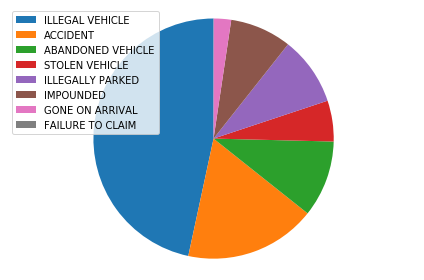

In [15]:
import matplotlib.pyplot as plt
labels='ILLEGAL VEHICLE', 'ACCIDENT', 'ABANDONED VEHICLE', 'STOLEN VEHICLE', 'ILLEGALLY PARKED', 'IMPOUNDED', 'GONE ON ARRIVAL', 'FAILURE TO CLAIM'
sizes =totalnumviolation
patches,texts=plt.pie(sizes,startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [16]:

def license_state_count(conn,db_file):
    c = conn.cursor()
    c.execute("""select LICENSE_STATE FROM TOWS""")
    alllicensestat=c.fetchall()
    licensestats=[]
    USstates = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
    for i in range(0,len(alllicensestat)):
        licensestat=alllicensestat[i][0]
        if licensestat not in licensestats:
            if len(licensestat)==2:
                if licensestat in USstates:

                    licensestats.append(licensestat)

    total_license_state_num=[]                

    for state in licensestats:
        countcommand="""SELECT COUNT (LICENSE_STATE) FROM TOWS WHERE LICENSE_STATE='%s'""" %state
        c.execute(countcommand)
        m=c.fetchone()[0]
        total_license_state_num.append(m)
    return licensestats,total_license_state_num


In [17]:
db_file = 'Tows.db'
conn = create_connection(db_file)
licensestats,total_license_state_num=license_state_count(conn,db_file)
print(licensestats)
print(total_license_state_num)
conn.close()

['NY', 'PA', 'AL', 'OK', 'TN', 'FL', 'SC', 'IN', 'MI', 'NC', 'MA', 'AZ', 'IL', 'GA', 'LA', 'NH', 'VA', 'OH', 'CT', 'MS', 'CA', 'NV', 'MD', 'NJ', 'TX', 'IA', 'KY', 'OR', 'UT', 'KS', 'WV', 'CO', 'WA', 'WY', 'RI', 'WI', 'VT', 'DE', 'NM', 'MO', 'SD', 'AK', 'AR', 'DC', 'ME', 'NE', 'MN', 'MT', 'ND', 'ID']
[63366, 437, 68, 25, 108, 377, 69, 55, 147, 237, 135, 78, 72, 177, 24, 29, 184, 379, 89, 16, 89, 12, 119, 141, 161, 12, 39, 15, 8, 23, 14, 17, 28, 3, 18, 31, 17, 28, 6, 32, 6, 5, 9, 8, 23, 9, 20, 5, 4, 2]


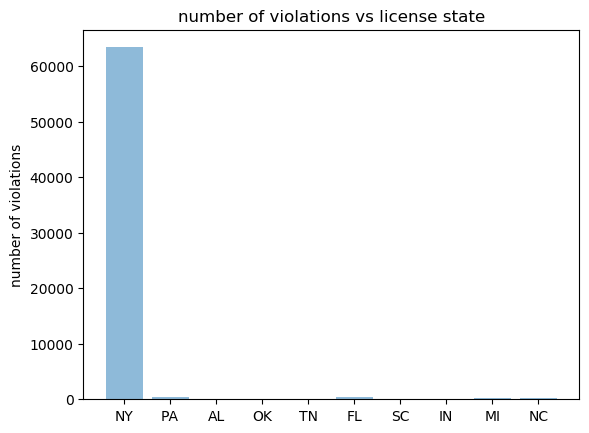

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(licensestats[:10]))
plt.bar(y_pos,total_license_state_num[:10], align='center', alpha=0.5)
plt.xticks(y_pos,licensestats[:10])
plt.ylabel('number of violations')
plt.title('number of violations vs license state')

plt.show()

In [19]:

def over_year_violations(conn,db_file):
    c = conn.cursor()
    years=[]
    tow_num=[]
    for i in range (2007,2020):
        executecommand="""select Count(TOW_DATE) FROM TOWS WHERE TOW_DATE BETWEEN '%s' AND '%s'"""%(i,i+1)
        c.execute(executecommand)
        years.append(i)
        m=c.fetchone()[0]
        tow_num.append(m)
    return(years,tow_num)


In [20]:

db_file = 'Tows.db'
conn = create_connection(db_file)
years,tow_num=over_year_violations(conn,db_file)
conn.close()

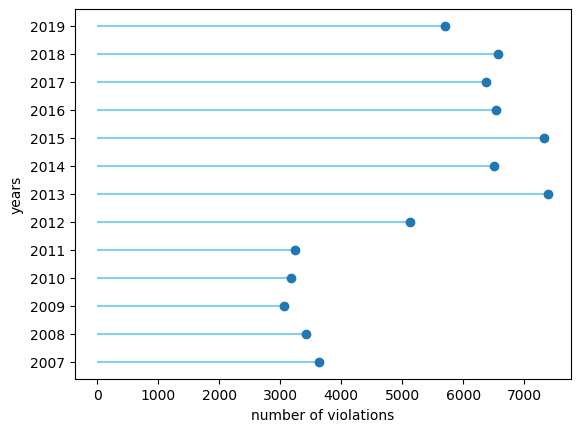

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
maxvalue=tow_num
plt.hlines(y=years, xmin=0, xmax=maxvalue, color='skyblue')
plt.plot(tow_num, years, "o")
plt.yticks(years)
plt.xlabel('number of violations')
plt.ylabel('years')

plt.show()

In [14]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select DISTINCT COUNCIL_DISTRICT FROM TOWS"""
pd.read_sql_query(executecommand,conn)

,COUNCIL_DISTRICT
0,NIAGARA
1,MASTEN
2,FILLMORE
3,ELLICOTT
4,SOUTH
5,NORTH
6,LOVEJOY
7,DELAWARE
8,UNIVERSITY
9,UNKNOWN


In [60]:
def COUNCIL_DISTRICT_count(conn,db_file):
    c = conn.cursor()
    c.execute("""select COUNCIL_DISTRICT FROM TOWS""")
    num_council_district=c.fetchall()
    council_districts=[]
    Buffalo_Council_District = ["NIAGARA", "MASTEN", "FILLMORE", "ELLICOTT", "SOUTH", "NORTH", 
                                "LOVEJOY", "DELAWARE", "UNIVERSITY", "UNKNOWN"]
    for i in range(0,len(num_council_district)):
        council_district=num_council_district[i][0]
        if council_district not in council_districts:
            if len(council_district)==2:
                if council_district in  Buffalo_Council_District :

                    council_districts.append(council_district)

    total_num_council_district=[]                

    for val in council_districts:
        countcommand="""SELECT COUNT (COUNCIL_DISTRICT) FROM TOWS WHERE COUNCIL_DISTRICT='%s'""" %Buffalo_Council_District
        c.execute(countcommand)
        m=c.fetchone()[0]
        total_num_council_district(m)
    return council_districts,total_num_council_district

In [39]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select DISTINCT VEHICLE_MAKE  FROM TOWS"""
pd.read_sql_query(executecommand,conn)

,VEHICLE_MAKE
0,LINC
1,CADI
2,BUIC
3,TOYO
4,CHEV
5,FORD
6,HYUN
7,KIA
8,GMC
9,DODG


In [40]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select VEHICLE_MAKE as auto FROM TOWS"""
PMK = pd.read_sql_query(executecommand,conn)

In [32]:
PMK, type(PMK)

(       auto
 0      LINC
 1      CADI
 2      BUIC
 3      TOYO
 4      CHEV
 5      FORD
 6      HYUN
 7      FORD
 8       KIA
 9      CHEV
 10     CHEV
 11     CHEV
 12      GMC
 13     DODG
 14     CHRY
 15     HOND
 16     CHEV
 17     FORD
 18     BUIC
 19     HOND
 20     OLDS
 21     CADI
 22     VOLV
 23      GMC
 24     PONT
 25     FORD
 26     MINI
 27     ACUR
 28     SAAB
 29     VOLV
 ...     ...
 67991  HYUN
 67992  VOLK
 67993  FORD
 67994   BMW
 67995  MAZD
 67996  FORD
 67997  FORD
 67998  HYUN
 67999  HOND
 68000  JEEP
 68001  TOYO
 68002  PONT
 68003  AUDI
 68004   RAM
 68005  HOND
 68006  MOTO
 68007  DODG
 68008  LAND
 68009  HOND
 68010  FORD
 68011  AUDI
 68012  HOND
 68013  NISS
 68014  TOYO
 68015  FORD
 68016  PONT
 68017  HOND
 68018  POLI
 68019  BUIC
 68020  CHRY
 
 [68021 rows x 1 columns], pandas.core.frame.DataFrame)

In [35]:
PMK.loc[PMK['auto']=='AUDI'].count()

auto    344
dtype: int64

In [36]:
PMK.loc[PMK['auto']=='FORD'].count()

auto    9459
dtype: int64

In [41]:
PMK.loc[PMK['auto']=='HYUN'].count()

auto    1503
dtype: int64

In [43]:
PMK.loc[PMK['auto']=='TOYO'].count()

auto    3422
dtype: int64

In [44]:
PMK.loc[PMK['auto']=='CHEV'].count()

auto    12238
dtype: int64

In [45]:
PMK.loc[PMK['auto']=='BMW'].count()

auto    621
dtype: int64

In [46]:
PMK.loc[PMK['auto']=='SUBA'].count()

auto    254
dtype: int64

In [47]:
PMK.loc[PMK['auto']=='LEXU'].count()

auto    337
dtype: int64

In [48]:
PMK.loc[PMK['auto']=='NISS'].count()

auto    2588
dtype: int64

In [22]:
dayofweek = ['AUDI','FORD','HYUN','TOYO','CHEV','BMW','SUBA','LEXU','NISS']
countofeach = [344,9459,1503,3422,12238,621,254,337,2588]

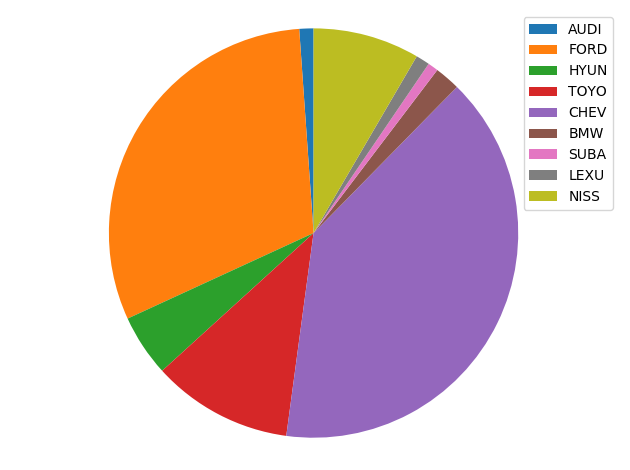

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [23]:
import matplotlib.pyplot as plt
labels = 'AUDI','FORD','HYUN','TOYO','CHEV','BMW','SUBA','LEXU','NISS'
sizes =countofeach
patches,texts=plt.pie(sizes,startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.save('Top_10_Popular_cars_in_America_and_their_ratio_in_the_Tow_Dataset.png')

In [23]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select POLICE_DISTRICT as police FROM TOWS"""
kj = pd.read_sql_query(executecommand,conn)

In [ ]:
kj, type(kj)

In [26]:
kj.loc[kj['police']=='District D'].count()

police    15587
dtype: int64

In [27]:
kj.loc[kj['police']=='District A'].count()

police    9236
dtype: int64

In [28]:
kj.loc[kj['police']=='District B'].count()

police    13536
dtype: int64

In [29]:
kj.loc[kj['police']=='District C'].count()

police    14405
dtype: int64

In [30]:
kj.loc[kj['police']=='District E'].count()

police    14884
dtype: int64

In [61]:
db_file = 'Tows.db'
conn = create_connection(db_file)
council_districts,total_num_council_district=COUNCIL_DISTRICT_count(conn,db_file)
print(council_districts)
print(total_num_council_district)
conn.close()

[]
[]


In [17]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select DISTINCT POLICE_DISTRICT FROM TOWS"""
kj = pd.read_sql_query(executecommand,conn)

In [ ]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select DISTINCT AGENCY FROM TOWS"""
pd.read_sql_query(executecommand,conn)

In [ ]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select DISTINCT CENSUS_BLOCK_GROUP FROM TOWS"""
pd.read_sql_query(executecommand,conn)

In [ ]:
import datetime
from datetime import date
date = '2008-03-21'
def findDay(date):
    year,month,day = (int(i) for i in date.split('-'))
    born = datetime.date(year,month,day)
    dates = born.strftime("%A")
    return dates


In [ ]:
print(findDay(date))

In [ ]:
def Violation_count(conn,db_file): 

    c = conn.cursor()
    c.execute("""select substr('SunMonTueWedThuFriSat', 1 + 3*strftime('%w', TOW_DATE), 3) as dow FROM TOWS""")
    alltowreasons=c.fetchall()
    towreasons=[]
    
    for i in range(0,len(alltowreasons)):
        towreason=alltowreasons[i][0]
        if towreason not in towreasons:
            towreasons.append(towreason)
        else:
            pass
    towreasons.remove('')
    totalnumviolation=[]
    
    for item in towreasons:
    #     print(item)
        countcommand="""SELECT COUNT (TOW_REASON) FROM TOWS WHERE TOW_REASON='%s'"""%item
    #     print(countcommand)
        c.execute(countcommand)
        m=c.fetchone()[0]
    #     print(m)
        totalnumviolation.append(m)
    return towreasons,totalnumviolation

In [ ]:
db_file = 'Tows.db'
conn = create_connection(db_file)
towreasons,totalnumviolation=Violation_count(conn,db_file)  
print(towreasons)
print(totalnumviolation)
conn.close()

In [ ]:
import matplotlib.pyplot as plt
labels='ILLEGAL VEHICLE', 'ACCIDENT', 'ABANDONED VEHICLE', 'STOLEN VEHICLE', 'ILLEGALLY PARKED', 'IMPOUNDED', 'GONE ON ARRIVAL', 'FAILURE TO CLAIM'
sizes =totalnumviolation
patches,texts=plt.pie(sizes,startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
def violationdays(conn,db_file):
    c = conn.cursor()
    dates = []
    tow_num = []
    for i in range (2007,2020):
        executecommand="""select substr('SunMonTueWedThuFriSat', 1 + 3*strftime('%w', TOW_DATE), 3) as dow FROM TOWS"""
        c.execute(executecommand)
        dates.append(i)
        m=c.fetchone()[0]
        tow_num.append(m)
        
        return(dates,tow_num)

In [ ]:

db_file = 'Tows.db'
conn = create_connection(db_file)
dates,tow_num=violationdays(conn,db_file)
conn.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
maxvalue=tow_num
plt.hlines(y=dates, xmin=0, xmax=maxvalue, color='skyblue')
plt.plot(tow_num, dates, "o")
plt.yticks(years)
plt.xlabel('number of violations')
plt.ylabel('day of week')

In [24]:
import pandas as pd
db_file = 'Tows.db'
conn = create_connection(db_file)
c = conn.cursor()
executecommand="""select substr('SunMonTueWedThuFriSat', 1 + 3*strftime('%w', TOW_DATE), 3) as dow FROM TOWS"""
# executecommand='select substr('SunMonTueWedThuFriSat', 1 + 3*strftime('%w', TOW_DATE), 3) as dow FROM TOWS'
bb =  """select count * from dow"""
# q1 = 'select count(dow) from ('+executecommand+') where dow=='Mon''
sample_data = pd.read_sql_query(executecommand,conn)
# pd.read_sql_query(q1,conn)

In [ ]:
sample_data, type(sample_data)

In [ ]:
sample_data.str.count('Monday')

In [54]:
sample_data.loc[sample_data['dow']=='Tue'].count()

dow    9829
dtype: int64

In [72]:
sample_data.loc[sample_data['dow']=='Mon'].count()

dow    9965
dtype: int64

In [73]:
sample_data.loc[sample_data['dow']=='Wed'].count()

dow    9948
dtype: int64

In [74]:
sample_data.loc[sample_data['dow']=='Thu'].count()

dow    10453
dtype: int64

In [75]:
sample_data.loc[sample_data['dow']=='Fri'].count()

dow    9831
dtype: int64

In [76]:
sample_data.loc[sample_data['dow']=='Sat'].count()

dow    9549
dtype: int64

In [77]:
sample_data.loc[sample_data['dow']=='Sun'].count()

dow    8446
dtype: int64

In [25]:
dayofweek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
countofeach = [9965,9829,9948,10453,9831,9549,8846]


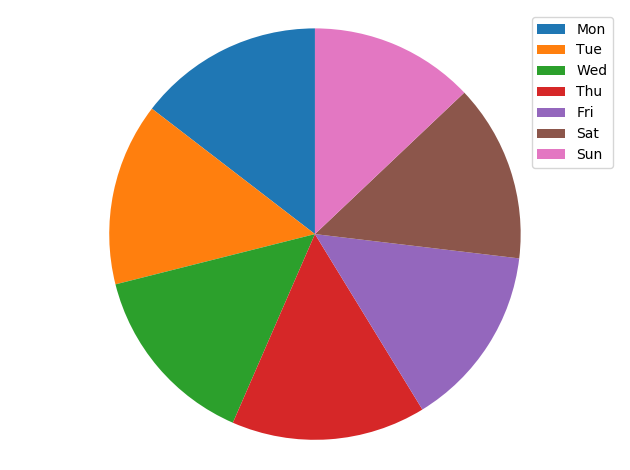

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [26]:
import matplotlib.pyplot as plt
labels = 'Mon','Tue','Wed','Thu','Fri','Sat','Sun'
sizes =countofeach
patches,texts=plt.pie(sizes,startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.save('Top_10_Popular_cars_in_America_and_their_ratio_in_the_Tow_Dataset.png')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
maxvalue=tow_num
plt.hlines(y=years, xmin=0, xmax=maxvalue, color='skyblue')
plt.plot(tow_num, years, "o")
plt.yticks(years)
plt.xlabel('number of violations')
plt.ylabel('years')

plt.show()